# transactionsデータ
- 前処理・可視化

In [12]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

comma_formatter = mpl.ticker.FuncFormatter(lambda x, _: u'{:,.0f}'.format(x))
sns.set(style='darkgrid', context='talk')
# mpl.rcParams['font.family'] = 'Meiryo'
% matplotlib inline

In [13]:
data_dir = 'C:/Users/hiroshi_kuriyama/Desktop/新人研修/08_データ分析演習1/01_データ/ローデータ/'
# fig_dir = '../figure'
# output_dir = '../output'

# データ読み込み

In [14]:
fname = os.path.join(data_dir, 'transactions.csv.gz')
df_transactions_raw = pd.read_csv(fname, dtype=np.object_, parse_dates=['transaction_date', 'membership_expire_date'])

In [15]:
print('count: {:,}'.format(len(df_transactions_raw)))

count: 3,318,230


In [16]:
# 概要
df_transactions_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318230 entries, 0 to 3318229
Data columns (total 9 columns):
msno                      object
payment_method_id         object
payment_plan_days         object
plan_list_price           object
actual_amount_paid        object
is_auto_renew             object
transaction_date          datetime64[ns]
membership_expire_date    datetime64[ns]
is_cancel                 object
dtypes: datetime64[ns](2), object(7)
memory usage: 227.8+ MB


In [17]:
# データの中身を確認
df_transactions_raw.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++0t0Uy2D3r1pRVxg28G3r3l5PfhFlCPMGElwHqbYL8=,35,7,0,0,0,2015-06-14,2015-06-15,0
1,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,38,30,149,149,0,2015-09-29,2015-10-29,0
2,++1TnybRWMiv1YN2UW5hyicLSm3AhDaU/89lFkZC//8=,41,30,149,0,1,2015-11-14,2015-12-14,0
3,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,38,30,149,149,0,2015-10-31,2015-11-30,0
4,++1TnybRWMiv1YN2UW5hyicLSm3AhDaU/89lFkZC//8=,41,30,149,0,1,2015-12-13,2015-12-13,1


## 統計量

In [18]:
desc_raw = df_transactions_raw.describe(include='all')
desc_raw

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,3318230,3318230,3318230,3318230,3318230,3318230,3318230,3318230,3318230
unique,403793,40,34,46,48,2,790,821,2
top,+PhENZHX27M62GNCb9LuaFZ1JdzPQyt1WCDiPwOCg10=,41,30,149,149,1,2016-10-31 00:00:00,2015-06-15 00:00:00,0
freq,41,1608835,2884922,1953201,1957591,2802224,35139,33025,3199984
first,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00,2015-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 00:00:00,2017-03-31 00:00:00,NaN


In [19]:
# 欠損値
df_transactions_raw.isnull().any()

msno                      False
payment_method_id         False
payment_plan_days         False
plan_list_price           False
actual_amount_paid        False
is_auto_renew             False
transaction_date          False
membership_expire_date    False
is_cancel                 False
dtype: bool

欠損値なし

# 集計・可視化

## 度数分布

In [20]:
payment_method_dist = df_transactions_raw['payment_method_id'].value_counts()
payment_method_dist.head(10) # 一部

41    1608835
40     375241
38     276622
39     265365
37     184418
34     134481
36     125735
35      91269
33      69020
31      46867
Name: payment_method_id, dtype: int64

In [21]:
# normalized
payment_method_norm_dist = df_transactions_raw['payment_method_id'].value_counts(normalize=1)
payment_method_norm_dist.head(10) # 一部

41    0.484847
40    0.113085
38    0.083364
39    0.079972
37    0.055577
34    0.040528
36    0.037892
35    0.027505
33    0.020800
31    0.014124
Name: payment_method_id, dtype: float64

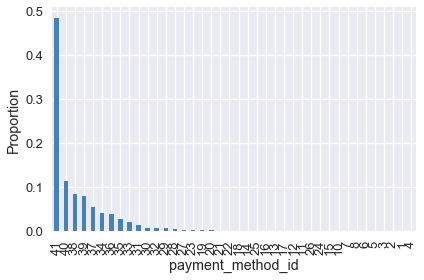

In [22]:
payment_method_norm_dist.plot.bar(color='steelblue')
plt.xlabel('payment_method_id')
plt.ylabel('Proportion')
plt.tight_layout()
# plt.savefig(os.path.join(fig_dir, 'barplot_payment_method_id.png'), dpi=200)
# - `payment_method_id=41` が半数
# - （コードの具体的意味は不明）

## ヒストグラム

(array([2.436770e+05, 1.740000e+02, 7.888450e+05, 2.124119e+06,
        1.058850e+05, 0.000000e+00, 2.000000e+00, 1.692000e+03,
        8.700000e+01, 0.000000e+00, 4.700000e+01, 2.618000e+03,
        4.212000e+03, 7.704000e+03, 1.100000e+01, 0.000000e+00,
        0.000000e+00, 1.440000e+02, 0.000000e+00, 1.030000e+03,
        1.000000e+00, 0.000000e+00, 1.940600e+04, 8.720000e+02,
        0.000000e+00, 1.270000e+02, 0.000000e+00, 0.000000e+00,
        1.000000e+01, 0.000000e+00, 9.260000e+02, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 2.150000e+03,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.447200e+04, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.700000e+01]),
 array([   0.,   40.,   80.,  120.,  160.,  200.,  240.,  280.,  320.,
         360.,  400.,  440.,  480.,  520.,  560.,  600.,  640.,  680.,
         720.,  760.,  800.,  840.,  880.,  920.,  9

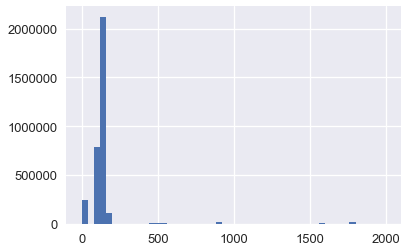

In [27]:
plt.hist(df_transactions_raw['plan_list_price'].astype(float), bins=50)

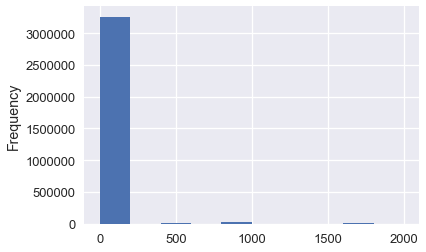

In [28]:
df_transactions_raw['plan_list_price'].astype(float).plot.hist()

## 散布図

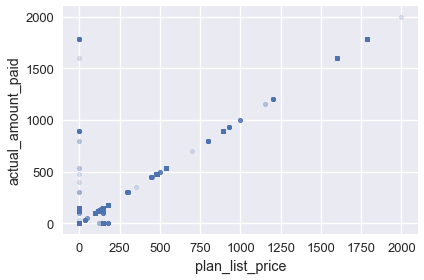

In [29]:
# プランの金額と実際の支払額
# （処理負荷軽減のため、1万件サンプリング）
cols = ['plan_list_price', 'actual_amount_paid']

np.random.seed(0)
tmp = df_transactions_raw[cols].astype('float').sample(n=100000)
tmp.plot.scatter(cols[0], cols[1], alpha=0.2)
plt.tight_layout()
# plt.savefig(os.path.join(fig_dir, 'scatter_plan-list-price_vs_actual_amount_paid.png'), dpi=200)

# - 概ね一致しているが一部異なっている（割引などか??）

## 折れ線グラフ

In [44]:
transaction_date_dist = df_transactions_raw.transaction_date.value_counts()
transaction_date_dist.head() # 一部

2016-10-31    35139
2016-08-31    35060
2016-09-30    34375
2016-07-31    34115
2016-11-30    33812
Name: transaction_date, dtype: int64

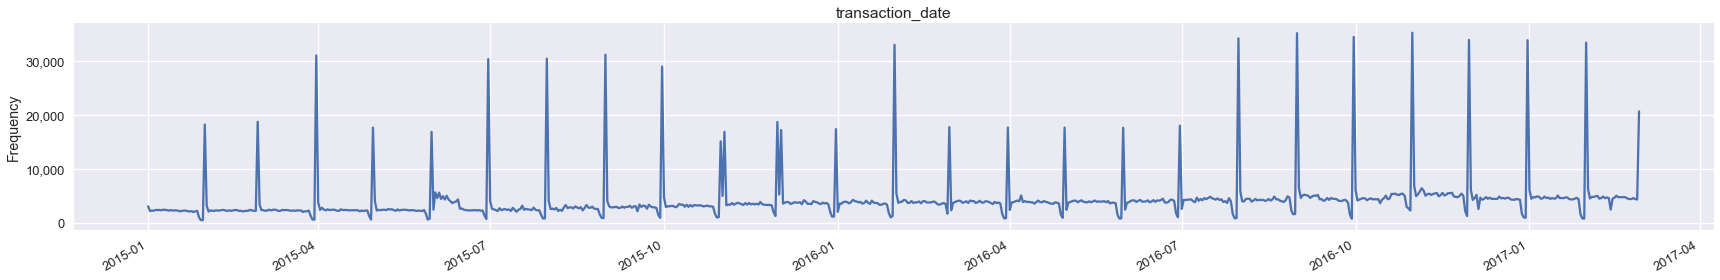

In [45]:
fig, ax = plt.subplots(figsize=(24, 4))
transaction_date_dist.plot(ax=ax) 
ax.set_title('transaction_date')
ax.set_ylabel('Frequency')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()
# plt.savefig(os.path.join(fig_dir, 'plot_transaction_date.png'), dpi=200)
# - 月末にスパイク

### 日付ごと

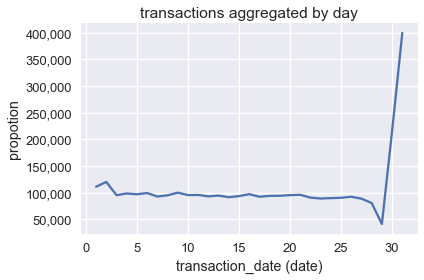

In [35]:
# transaction_dateの日付のみを取り出し、グルーピングし、それぞれの要素数を数える
agg = df_transactions_raw.groupby(df_transactions_raw.transaction_date.dt.day).size()
# display(agg)

ax = agg.plot()
ax.set_xlabel('transaction_date (date)')
ax.set_ylabel('propotion')
ax.set_title('transactions aggregated by day')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()
# - なぜか月末のレコード数が多い